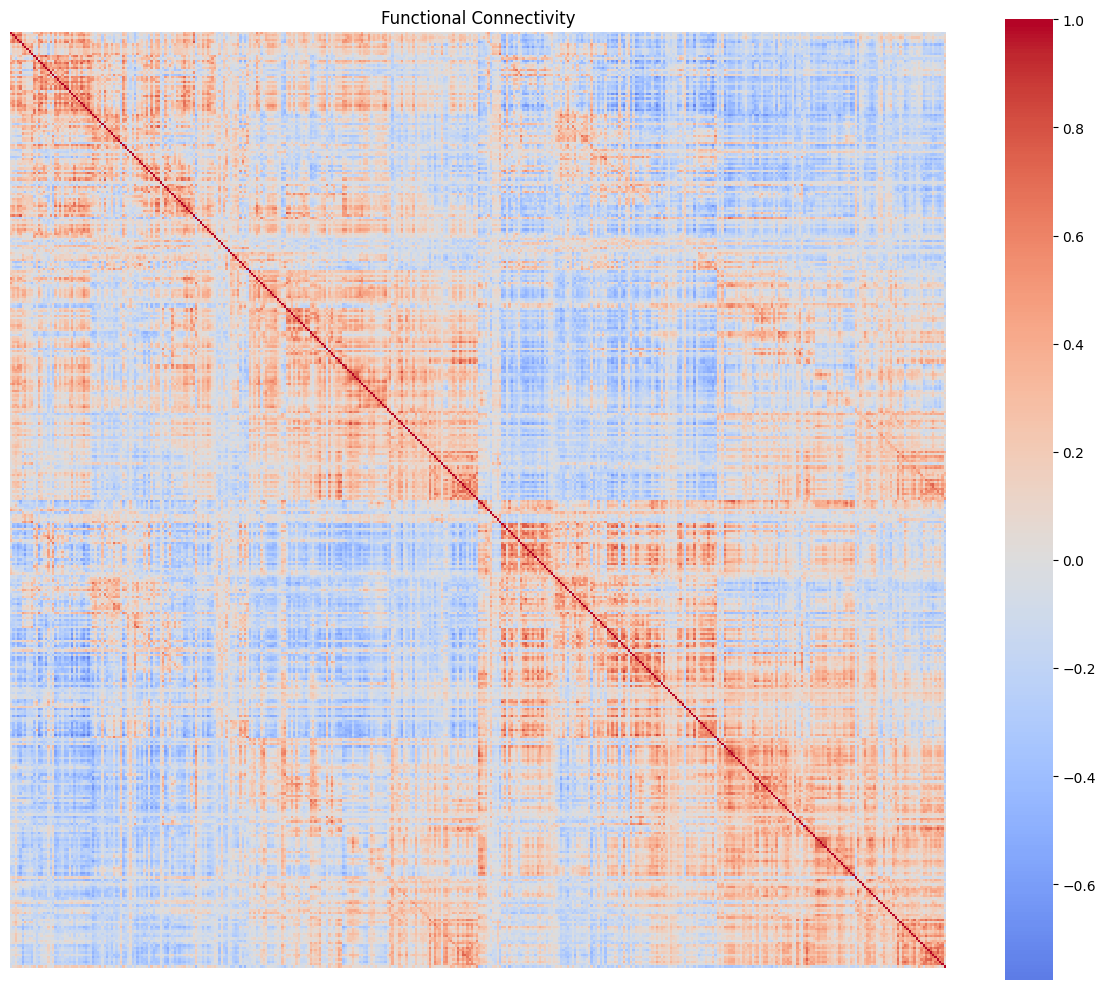

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

h5_path = 'task-restAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5'

with h5py.File(h5_path, 'r') as f:
    data = f['dataset'][:]  # Shape: (434, 488)

# Trim to cortical regions (first 400)
cortical_data = data[:400, :]

# Save trimmed data
with h5py.File("cortical_timeseries.h5", 'w') as f_out:
    f_out.create_dataset("dataset", data=cortical_data)

input_path = 'Schaefer2018_400Parcels_17Networks_order_info.txt'
output_path = 'cleaned_schaefer_labels.txt'

cleaned_labels = []
with open(input_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line and not any(c.isalpha() for c in line):
            continue  # skip lines with only numbers
        if line.startswith("17Networks_"):
            cleaned_labels.append(line.replace("17Networks_", ""))

with open(output_path, 'w') as f:
    for label in cleaned_labels:
        f.write(label + '\n')

assert len(cleaned_labels) == 400, "Should have exactly 400 cortical labels"

with h5py.File("cortical_timeseries.h5", "r") as f:
    data = f['dataset'][:]

df = pd.DataFrame(data, index=cleaned_labels)
df.columns = [f"t{i}" for i in range(data.shape[1])]
df.to_csv("labeled_cortical_timeseries.csv")
fc_matrix = np.corrcoef(data)
fc_df = pd.DataFrame(fc_matrix, index=cleaned_labels, columns=cleaned_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(fc_df, cmap='coolwarm', center=0, square=True, xticklabels=False, yticklabels=False)
plt.title("Functional Connectivity")
plt.tight_layout()
plt.show()